# Section 4 (Linear transformations)

## Example 4.1A

  Define a linear transformation $T : \mathbb{R}^{4} \to \mathbb{R}^{3}$ in terms
  of the standard basis $\mathscr{B} = \{ \vec{e}_{1},\vec{e}_{2},\vec{e}_{3},\vec{e}_{4} \}$ by
  \begin{align*}
    T(\vec{e}_{1}) & = \vec{y}_{1} = \begin{pmatrix}2 \\ 1 \\ 3 \end{pmatrix},
              & T(\vec{e}_{2})                             & = \vec{y}_{2} = \begin{pmatrix} -1 \\ 0 \\ 1 \end{pmatrix}, \\
    T(\vec{e}_{3}) & = \vec{y}_{3} = \begin{pmatrix} 0 \\ 1 \\ 5 \end{pmatrix},
              & T(\vec{e}_{4})                             & = \vec{y}_{4} = \begin{pmatrix}-5 \\ -2 \\ -5 \end{pmatrix}.
  \end{align*}
  Calculate the linear transformation $T$ and its rank and nullity.


## Solution to Example 4.1A

### Compute a formula for $T$

Import some useful stuff from sympy

In [5]:
from sympy import Matrix

We define a little function in python for creating vectors. In sympy (and in mathematics more generally), vectors are really just $n \times 1$ matrices, and this function is just syntactic sugar to create such a matrix without having to write so many brackets.

In [6]:
def Vector(*args):
    return Matrix([[x] for x in args])

In [7]:
e1, e2, e3, e4 = Vector(1, 0, 0, 0), Vector(0, 1, 0, 0), Vector(0, 0, 1, 0), Vector(0, 0, 0, 1)

In [8]:
y1, y2, y3, y4 = Vector(2, 1, 3), Vector(-1, 0, 1), Vector(0, 1, 5), Vector(-5, -2, -5)

In [9]:
def T(a, b, c, d):
    return a * y1 + b * y2 + c * y3 + d * y4

We need some "variables" which we will use to figure out a formula for $T$:

In [10]:
from sympy.abc import a, b, c, d

In [11]:
T(a, b, c, d)

Matrix([
[      2*a - b - 5*d],
[        a + c - 2*d],
[3*a + b + 5*c - 5*d]])

### Compute the rank of T

The rank of $T$ is the dimension of the image of $T$, and, by Proposition 4.1.8(i), the vectors $y_1, y_2, y_3, y_4$ span $\operatorname{im} T$. Hence the rank of $T$ equals $\operatorname{dim} \operatorname{Span}(y_1, y_2, y_3, y_4)$.
So we enter $y_1$, $y_2$, $y_3$, and $y_4$ as the columns (or rows) of a matrix $A$:

In [13]:
A = Matrix()
A = A.col_insert(0, y1)
A = A.col_insert(1, y2)
A = A.col_insert(2, y3)
A = A.col_insert(3, y4)
A

Matrix([
[2, -1, 0, -5],
[1,  0, 1, -2],
[3,  1, 5, -5]])

and compute the rank of $A$:

In [14]:
A.rank()

2

Hence the rank of $T$ is $2$.

### Compute the nullity of $T$

By the Rank-Nullity Theorem, $\operatorname{null} T = \operatorname{dim} \mathbb{R} ^ 4 - \operatorname{rank} T = 4 - 
2 = 2$.  This is a complete solution to the problem, just as an exercise we will also compute the dimension of the kernel of $T$ directly.

In [16]:
from sympy import solve

The next line is asking sympy to solve the equation
$$
A \begin{pmatrix} a \\ b \\ c \\ d \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \end{pmatrix}.
$$

In [18]:
solve(A * Vector(a, b, c, d), [a, b, c, d])

{b: -2*c - d, a: -c + 2*d}

So, the vectors 
$$
\begin{pmatrix} 
-1 \\ -2 \\ 1 \\ 0
\end{pmatrix},
\begin{pmatrix} 
2 \\ -1 \\ 0 \\ 1
\end{pmatrix}
$$
form a basis for the nullspace of $A$.

This approach requires that you remember (or have read ahead in the notes) that the matrix $A$ defined above is the matrix of the linear transformation $T$, and so the nullspace of $A$ and $T$ coincide. 

Here's yet another approach, solve the equation:
$$
T\begin{pmatrix}
a \\
b \\
c \\
d 
\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \end{pmatrix}
$$

In [24]:
from sympy import solve

In [26]:
solve(T(a, b, c, d), [a, b, c, d])

So, if $a = -c + 2d$ and $b = -2c - d$, then 
$$
T\begin{pmatrix}
a \\
b \\
c \\
d 
\end{pmatrix} = 
T
\begin{pmatrix}
-c + 2d \\
-2c - d \\
c \\
d 
\end{pmatrix}
= 
\begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \end{pmatrix}.
$$

Clearly, every vector of the form:
$$
\begin{pmatrix}
-c + 2d \\
-2c - d \\
c \\
d 
\end{pmatrix}
= 
c \begin{pmatrix}
-1 \\ -2 \\ 1\\ 0
\end{pmatrix}
+ d 
\begin{pmatrix}
2 \\ -1 \\ 0 \\ 1
\end{pmatrix}
\in \operatorname{Span}
\begin{pmatrix}
-1 \\ -2 \\ 1\\ 0
\end{pmatrix}, 
\begin{pmatrix}
2 \\ -1 \\ 0 \\ 1
\end{pmatrix}.
$$
Hence 
$$\begin{pmatrix}
-1 \\ -2 \\ 1\\ 0
\end{pmatrix}, 
\begin{pmatrix}
2 \\ -1 \\ 0 \\ 1
\end{pmatrix}
$$
span the nullspace of $T$. To show that these vectors are linearly independent, we insert them as the columns of a matrix and compute its rank (as per Algorithm 1):

In [27]:
B = Matrix([[-1, 2], [-2, -1], [1, 0], [0, 1]])

In [28]:
B.rank()

Since the rank of $B$ is $2$, Algorithm 1, informs us that these vectors are linearly independent, and hence form a basis for the nullspace of $T$.

## Example 4.2.2

  Define a linear transformation $T \colon \mathbb{R}^{4} \to \mathbb{R}^{4}$ by
  the following formula:
  $$
    T \begin{pmatrix} x \\
 y \\
 z \\
 t \\
 \end{pmatrix} = \begin{pmatrix} x+4y \\
 y \\
 2z+t \\
 z+2t \\
 \end{pmatrix}.
  $$
  Let $\mathscr{B} = \{ \vec{e}_{1},\vec{e}_{2},\vec{e}_{3},\vec{e}_{4} \}$ denote the standard
  basis for $\mathbb{R}^{4}$ and let $\mathscr{C}$ be the basis
  $$
    \mathscr{C} = \{ \vec{v}_{1},\vec{v}_{2},\vec{v}_{3},\vec{v}_{4}
    \} = \left\{ \begin{pmatrix} 2 \\
 0 \\
 2 \\
 0 \\
 \end{pmatrix}, \begin{pmatrix} 0 \\
 1 \\
 -1 \\
 0 \\
 \end{pmatrix},
    \begin{pmatrix} 0 \\
 0 \\
 1 \\
 0 \\
 \end{pmatrix}, \begin{pmatrix} 3 \\
 0 \\
 0 \\
 1 \\
 \end{pmatrix} \right\}.
 $$
  Determine the matrix of $T$ with respect to $\mathscr{B}$ and $\mathscr{B}$; $\mathscr{C}$ and $\mathscr{B}$; and 
  finally with respect to $\mathscr{C}$ and $\mathscr{C}$.

## Solution to Example 4.2.2

According to the definition of the matrix of a linear transformation, we must express every $T(\vec{e}_i)$ as a linear combination of the vector in $\mathscr{B}$. Let's define $T$ as a python function:

In [33]:
def T(x, y, z, t):
    return Vector(x + 4 * y, y, 2 * z + t, z + 2 * t)

Since $\mathscr{B}$ is the standard basis the columns of the matrix are given by:

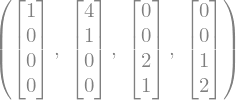

In [35]:
T(1, 0, 0, 0), T(0, 1, 0, 0), T(0, 0, 1, 0), T(0, 0, 0, 1)

Hence the matrix of $T$ with respect to $\mathscr{B}$ and $\mathscr{B}$ is:
$$
\begin{pmatrix}
      1 & 4 & 0 & 0 \\
      0 & 1 & 0 & 0 \\
      0 & 0 & 2 & 1 \\
      0 & 0 & 1 & 2
\end{pmatrix}
$$

To compute the matrix of $T$ with respect to $\mathscr{C}$ and $\mathscr{B}$ we must express the image of each vector in $\mathscr{C}$ under $T$ as a linear combination of the vectors in $\mathscr{B}$. Again since $\mathscr{B}$ is the standard basis this is easy:

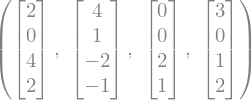

In [39]:
T(2, 0, 2, 0), T(0, 1, -1, 0), T(0, 0, 1, 0), T(3, 0, 0, 1)

and so the matrix of $T$ with respect to $\mathscr{C}$ and $\mathscr{B}$ is:
$$
\begin{pmatrix}
2 & 4  & 0 & 3 \\
      0 & 1  & 0 & 0 \\
      4 & -2 & 2 & 1 \\
      2 & -1 & 1 & 2
      \end{pmatrix}.
$$

To compute the matrix of $T$ with respect to $\mathscr{C}$ and $\mathscr{C}$ is harder, because it isn't immediately apparent how to express $T(\vec{v}_i)$ as a linear combination of vectors in $\mathscr{C}$. Thankfully, python can help us with that too

In [40]:
v1, v2, v3, v4 = Vector(2, 0, 2, 0), Vector(0, 1, -1, 0), Vector(0, 0, 1, 0), Vector(3, 0, 0, 1)

In [41]:
Tv1, Tv2, Tv3, Tv4 = T(2, 0, 2, 0), T(0, 1, -1, 0), T(0, 0, 1, 0), T(3, 0, 0, 1)

In [43]:
from sympy.abc import a, b, c, d
from sympy import solve

In [44]:
solve(a * v1 + b * v2 + c * v3 + d * v4 - Tv1, [a, b, c, d])

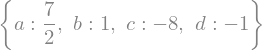

In [45]:
solve(a * v1 + b * v2 + c * v3 + d * v4 - Tv2, [a, b, c, d])

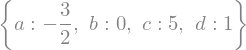

In [47]:
solve(a * v1 + b * v2 + c * v3 + d * v4 - Tv3, [a, b, c, d])

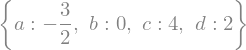

In [48]:
solve(a * v1 + b * v2 + c * v3 + d * v4 - Tv4, [a, b, c, d])

Hence the required matrix is:
$$
\frac{1}{2}
    \begin{pmatrix}
      -4 & 7 & -3 & -3 \\
      0  & 2            & 0             & 0             \\
      16  & -16           & 10             & 8             \\
      4  & -2           & 2             & 4
    \end{pmatrix}.
$$

## Example 4.3.3

  Let $V$ be a $2$-dimensional vector space over $\mathbb{R}$ with basis
  $\mathscr{B} = \{ v_{1},v_{2} \}$.  Let
  \begin{equation*}
    w_{1} = 3v_{1} - 5v_{2}\\
    w_{2} = -v_{1}+2v_{2}
  \end{equation*}
  and $\mathscr{C} = \{ w_{1},w_{2} \}$.  Define the linear
  transformation $T: V \to V$ by
  \begin{align*}
    T(v_{1}) & = 16v_{1} - 30v_{2} \\
    T(v_{2}) & = 9v_{1} - 17v_{2}.
  \end{align*}
  Find the matrix Mat$_{\mathscr{C},\mathscr{C}}(T)$.


## Solution to Example 4.3.3

There are several possible solutions, but we will use the change of basis matrix since this is in the section about change of basis matrices.

 The formula for $T$ tells us that:
 $$
     A = \operatorname{Mat}_{\mathscr{B},\mathscr{B}}(T) = 
    \begin{pmatrix} 
      16 & 9 \\ 
      -30 & -17
    \end{pmatrix}.
$$

In [7]:
from sympy import Matrix
A = Matrix([[16, 9], [-30, -17]])

Since 
 \begin{equation*}
   id(w_1) = w_{1} = 3v_{1} - 5v_{2}\\
   id(w_2) =  w_{2} = -v_{1}+2v_{2},
  \end{equation*}
we can also express the change of basis matrix
$$P = \operatorname{Mat}_{\mathscr{C}, \mathscr{B}}(\operatorname{id}) = 
\begin{pmatrix}
3 & -1 \\
-5 & 2
\end{pmatrix}.
$$

In [8]:

P = Matrix([[3, -1], [-5, 2]])

Hence $\operatorname{Mat}_{\mathscr{C}, \mathscr{C}}(T) = P ^ {-1} A P = $

In [9]:
P ** -1 * A * P

Matrix([
[1,  0],
[0, -2]])

## Example 4.3A

  Let
  $$
    \mathscr{B} = \left\{ \begin{pmatrix}0 \\ 1 \\ -1 \end{pmatrix} 
                \begin{pmatrix} 1 \\ 0 \\ -1 \end{pmatrix}
                \begin{pmatrix} 2 \\ -1 \\0\end{pmatrix} 
                \right\}.
  $$
 
  (i) Show that $\mathscr{B}$ is a basis for $\mathbb{R}^{3}$.
  
  (ii) Write down the change of basis matrix from the standard basis $\mathscr{E} = \{ \vec{e}_{1},\vec{e}_{2},\vec{e}_{3}\}$ to $\mathscr{B}$.
  
  (iii) Let $$
            A = \begin{pmatrix}
              -2 & -2 & -3 \\
              1  & 1  & 2  \\
              -1 & -2 & -2
            \end{pmatrix}
          $$
     and view $A$ as a linear transformation $\mathbb{R}^{3} \to \mathbb{R}^{3}$.  Find
     the matrix of $A$ with respect to the basis $\mathscr{B}$.


## Solution to Example 4.3A

### Part (i)

To show that $\mathscr{B}$ is a basis for $\mathbb{R} ^ 3$ we put the columns into a matrix and compute the rank. 

In [11]:
from sympy import Matrix

In [12]:
Matrix([[0, 1, 2], [1, 0, -1], [-1, -1, 0]]).rank()

3

Hence we deduce that $\mathscr{B}$ is linearly independent.

### Part (ii)

We write each vector in $\mathscr{B}$ in terms of the standard basis, so that the change of basis matrix $P = \operatorname{Mat}_{\mathscr{E}, \mathscr{B}}(\operatorname{id})$ is
$$
P = \operatorname{Mat}_{\mathscr{E}, \mathscr{B}}(\operatorname{id}) = 
\begin{pmatrix}
0 & 1 & 2 \\
1 & 0 & -1 \\
-1 & -1 & 0.
\end{pmatrix}$$

In [32]:
P = Matrix([[0, 1, 2], [1, 0, -1], [-1, -1, 0]])

### Part (iii)

In [24]:
def Vector(*args):
    return Matrix([[x] for x in args])
from sympy.abc import a, b, c
from sympy import solve

In [25]:
A = Matrix([[-2, -2, -3], [1, 1, 2], [-1, -2, -2]])

In [26]:
v1, v2, v3 = Vector(0, 1, -1), Vector(1, 0, -1), Vector(2, -1, 0)

In [27]:
A * v1

Matrix([
[ 1],
[-1],
[ 0]])

In [28]:
solve(a * v1 + b * v2 + c * v3 - A * v1, [a, b, c])

{a: -1, b: 1, c: 0}

In [30]:
solve(a * v1 + b * v2 + c * v3 - A * v2, [a, b, c])

{a: 0, b: -1, c: 1}

In [31]:
solve(a * v1 + b * v2 + c * v3 - A * v2, [a, b, c])

{a: 0, b: -1, c: 1}

So, if $T: \mathbb{R} ^ 3 \to \mathbb{R} ^ 3$ is defined by $T(\vec{v}) = A\vec{v}$, then
$$
\operatorname{Mat}_{\mathscr{B}, \mathscr{B}}(T) = 
\begin{pmatrix}
-1 & 0 & 0 \\
1 & -1 & -1 \\
0 & 1 & 1
\end{pmatrix}$$

### Alternative solution to part (iii)

The previous solution didn't use the change of basis matrix. Here's a solution that does. Using the change of basis matrix from $\mathscr{E}$ to $\mathscr{B}$ found in part (ii), we compute:

In [0]:
P = Matrix([[0, 1, 2], [1, 0, -1], [-1, -1, 0]])

The matrix $\operatorname{Mat}_{\mathscr{B}, \mathscr{B}}(T)$ is then $P ^ {-1} A P$, which we compute as:

In [36]:
P ** -1 * A * P

Matrix([
[-1,  0,  0],
[ 1, -1,  0],
[ 0,  1, -1]])